In [86]:
import pandas as pd

In [149]:
path = 'data/processed'
df = pd.read_csv(path+"/COVID19_ZM_transformedTweets.csv")
print(df.shape)
df.head(1)

(5232, 10)


,Unnamed: 0,Hashtags,Sentiment,SentimentClass,date,geo,id,retweets,text,username
0,0,NaN,-0.5,Negative,2020-05-13 07:07:33+00:00,NaN,1260466697661808642,0,Zambia May Not Get IMF Covid Loan Because It H...,ZambianObserver


In [150]:
df['created_at'] =  pd.to_datetime(df['date'])
df['date'] =  pd.to_datetime(df['created_at']).dt.date
df.head(1)

,Unnamed: 0,Hashtags,Sentiment,SentimentClass,date,geo,id,retweets,text,username,created_at
0,0,NaN,-0.5,Negative,2020-05-13,NaN,1260466697661808642,0,Zambia May Not Get IMF Covid Loan Because It H...,ZambianObserver,2020-05-13 07:07:33+00:00


In [151]:
get_tweets=get_tweet_for_specific_range("2020-05-05","2020-05-13")

merged_text_col=merge_df_col_val(get_tweets["text"])
remove_RT_from_text=remove_RT(merged_text_col)
punct_rmvd_from_txt=remove_punct_marks(merged_text_col)
stp_wrds_rmvd_from_txt=remove_stop_words(punct_rmvd_from_txt)
meanless_wrds_rmvd_from_txt=remove_meaninglesswords(stp_wrds_rmvd_from_txt)
rmv_numbers_from_txt=remove_numeric(meanless_wrds_rmvd_from_txt)

In [156]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style('darkgrid')

#create freq and dist plot
tweet_txt=rmv_numbers_from_txt
words=tweet_txt.split(" ")
nlp_words=nltk.FreqDist(words).most_common(25)

df_freq=pd.DataFrame(nlp_words, columns=['word', 'frequency'])
df_freq.head()

,word,frequency
0,new,285
1,tanzania,284
2,border,257
3,nakonde,117
4,closes,82


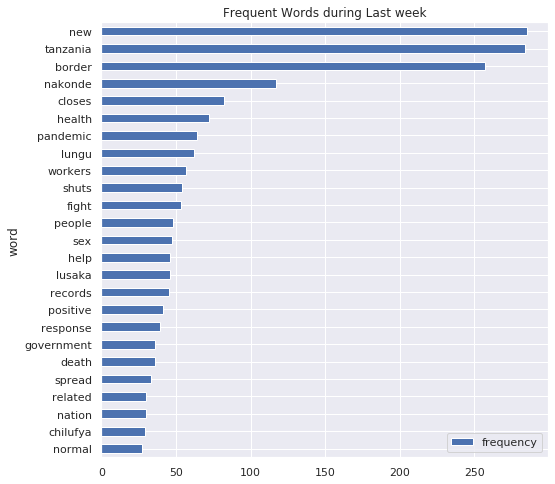

In [157]:
fig,ax=plt.subplots(figsize=(8,8))

df_freq.sort_values(by='frequency').plot.barh(x="word",y="frequency",ax=ax)
ax.set_title("Frequent Words during Last week")
plt.show()

In [147]:
import nltk
nltk.download('stopwords')

sw=nltk.corpus.stopwords.words('english')

def remove_stop_words(txt):
    words= txt.split(" ")
    words_ns=[]
    
    for word in words:
        if word not in sw:
            words_ns.append(word)
    
    return list_to_str(words_ns)

[nltk_data] Downloading package stopwords to /home/yas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
def remove_numeric(txt):
    words=txt.split(" ")
    words_ns=[]
    
    for word in words:
        if word.isnumeric() == False:
            words_ns.append(word)
    return list_to_str(words_ns)

In [8]:
def list_to_str(lst):
    nwstr=""
    for i in lst:
        nwstr+=i+" "
        
    return nwstr

In [9]:
def get_nouns(txt):
    nouns=['NNP','NN']
    new_tagged=[]
    
    text = word_tokenize(txt)
    tagged = nltk.pos_tag(text) 
    
    for tag in tagged:
        if tag[1] in nouns:
            new_tagged.append(tag[0])

    return list_to_str(new_tagged)
  

In [148]:
def remove_meaninglesswords(txt):
    words=txt.split(" ")
    meanless_words=['rt','na','ya','http','https','edgarclungu','tame','www','wa','amp','dr','com', \
                    'today','minister','covid_19','like','co','number','facebook','zambian','day','morocco', \
                    'covid-19','zambia','may','covid','coronavirus','country', \
                    'via','us','chng','cases','case','first','tot','total','countries',\
                    'two','amid','must','confirm','bit','confirmed','virus',\
                   'time','covid19','edgar','news','update','let','confirms','ly', \
                    'ministry','zimbabwe','corona','last','since', \
                   'botswana', 'burundi','need', 'central' ,'african','republic', 'cote','ivoire', \
                'eritrea','tests','ethiopia', 'kenya', 'malawi', 'mozambique', 'namibia', \
                    'rwanda','deaths','president','south' ,'town','africa','100th','eswatini', \
                    'recorded','uganda','24hrs','hours','one']
    words_ns=[]
    
    for word in words:
        if word not in meanless_words:
            words_ns.append(word)
    
    return list_to_str(words_ns)

In [11]:
def remove_RT(txt):
    words=txt.split(" ")
    words_ns=[]
    
    for word in words:
        if '@' not in word:
            words_ns.append(word)
    
    return list_to_str(words_ns)

In [85]:
def merge_df_col_val(txt_col):
    newstr=""
    for t in txt_col.values.flatten():
        newstr+=str(t).lower() + ''
    return newstr

In [13]:
import re

def remove_punct_marks(txt):
    lst= re.findall('\w+',txt)
    
    return list_to_str(lst)

In [14]:
def get_tweet_for_specific_range(str_strt_date,str_end_date):
    strt=pd.to_datetime(str_strt_date).date()
    end=pd.to_datetime(str_end_date).date()
    return df[(df["date"]>=strt) & (df["date"]<=end)]

In [24]:
rmv_numbers_from_txt

'closes border tanzania tame dlvr rwscts updates africa may gmt chad total benin total total togo total africa top death toll exceeds covidー19 coronavirusupdate coronavirusupdates closes border tanzania tame dailynation allafrica stories html utm_campaign allafrica 3aeditor utm_medium social utm_source twitter utm_content promote 3aaans 3aacbxam eastafrica coronavirusinafrica covid19coronavirus sex workers praised contact tracing covid_19so wanataka kutumia mgongo wa kwa issue ya federation think also included evolution botswana burundi central african republic cote ivoire eritrea ethiopia kenya malawi mozambique namibia rwanda south africa eswatini uganda since 100th evolution number total kmutisi hamburamukaka geek_breezy prostitutes help government trace clients rapid increase find cumulative data pandemic started say closing borders tz positive testing sex workers help authorities trace clients tabloid thetabloid co zw sex workers help authorities trace clients 263chart twimbos har